In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score as accuracy
import warnings

### Carregando o dataset e dropando o education por já existir uma var númerica equivalente.

In [2]:
warnings.simplefilter('ignore')
colunas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
         'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
         'hours-per-week','native-country', 'label']
data = pd.read_csv('adult.data', na_values='?', sep=',\s+', names=colunas)

data = data.drop('education', axis=1)

### Breve exploração do dataset

In [3]:
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
dtype: int64

In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
label             32561 non-null object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [7]:
print(data.groupby('label').size())

label
<=50K    24720
>50K      7841
dtype: int64


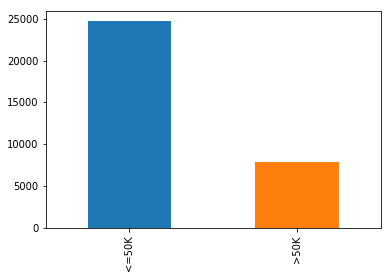

In [8]:
data['label'].value_counts().plot(kind='bar');

### Alocando o valor represetante da moda da feature nas posições com valores faltantes

In [9]:
for i in ['workclass', 'occupation', 'native-country']:
    data[i] = data[i].replace(np.nan, data[i].mode()[0])

In [10]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

### Transformando todas as features categóricas para numéricas 

In [11]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,label_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Separando o label das features

In [12]:
X = data.drop(['label_>50K'], axis=1)
y = data[['label_>50K']]

In [13]:
X.shape, y.shape

((32561, 82), (32561, 1))

## Avaliação dos classificadores

In [14]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

### Dividindo o dataset para treino e teste e standardizando os valores das features

In [15]:
warnings.simplefilter('ignore')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y,shuffle=True) 

scaler = StandardScaler()

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

### Criando os classificadores

In [16]:
Per = Perceptron(max_iter = 1000)
SGD = SGDClassifier(max_iter = 1000)
Log = LogisticRegression(solver='lbfgs')
KNN = KNeighborsClassifier(n_neighbors=5)
Gau = GaussianNB()
SVC = SVC(gamma='auto')
DTC = DecisionTreeClassifier()

classifiers = [Per, SGD, Log, KNN, Gau, SVC, DTC]
classifiersNames = ['Perceptron', 'SGD', 'LogisticRegression', 'KNN', 'GaussianNB', 'SVC', 'DecisionTreeClassifier']

### Utilizando o cross validation com um 5fold, para verificar a acurácia dos classificadores

In [17]:
warnings.simplefilter('ignore')

cv = KFold(n_splits=5, shuffle=True, random_state=42)

a = 0
for i in classifiers:
    pipeline = Pipeline([('transformer', scaler), ('estimator', i)])
    acc = cross_val_score(pipeline, np.float64(X), y, cv=cv, scoring='accuracy')
    print(classifiersNames[a],' : ',np.mean(acc))
    a = a + 1

Perceptron  :  0.8056562786353206
SGD  :  0.8509872807777
LogisticRegression  :  0.8507722930627122
KNN  :  0.8267558155282705
GaussianNB  :  0.4471627101118119
SVC  :  0.8499737908420544
DecisionTreeClassifier  :  0.8150239588862345


### Utilizando o melhor classificador do cross val para avaliar a acurácia com: dados stanrdizados, com 80% pra treino e 20% pra teste

In [18]:
SGD.fit(X_train_std, y_train)
y_pred = SGD.predict(X_test_std)
print('Best Accuracy:', accuracy(y_pred, y_test))


Best Accuracy: 0.8547520343927529
